In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",parse_dates = True, index_col=0)

*index_col=0* Toma la primera columna como índice.

*parse_dates = True* Intenta analizar el índice como fecha y hora de forma predeterminada

## Coeficiente de asimetría de Fisher

El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica. Dada una muestra $\{x_1,x_2,...,x_n \}$,  la fórmula del coeficiente de asimetría de Fisher es:

\begin{equation*}
\gamma_1=\frac{\sum_{i=1}^n (x_i-\overline{x})^3}{n s^3}.
\end{equation*}



Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.


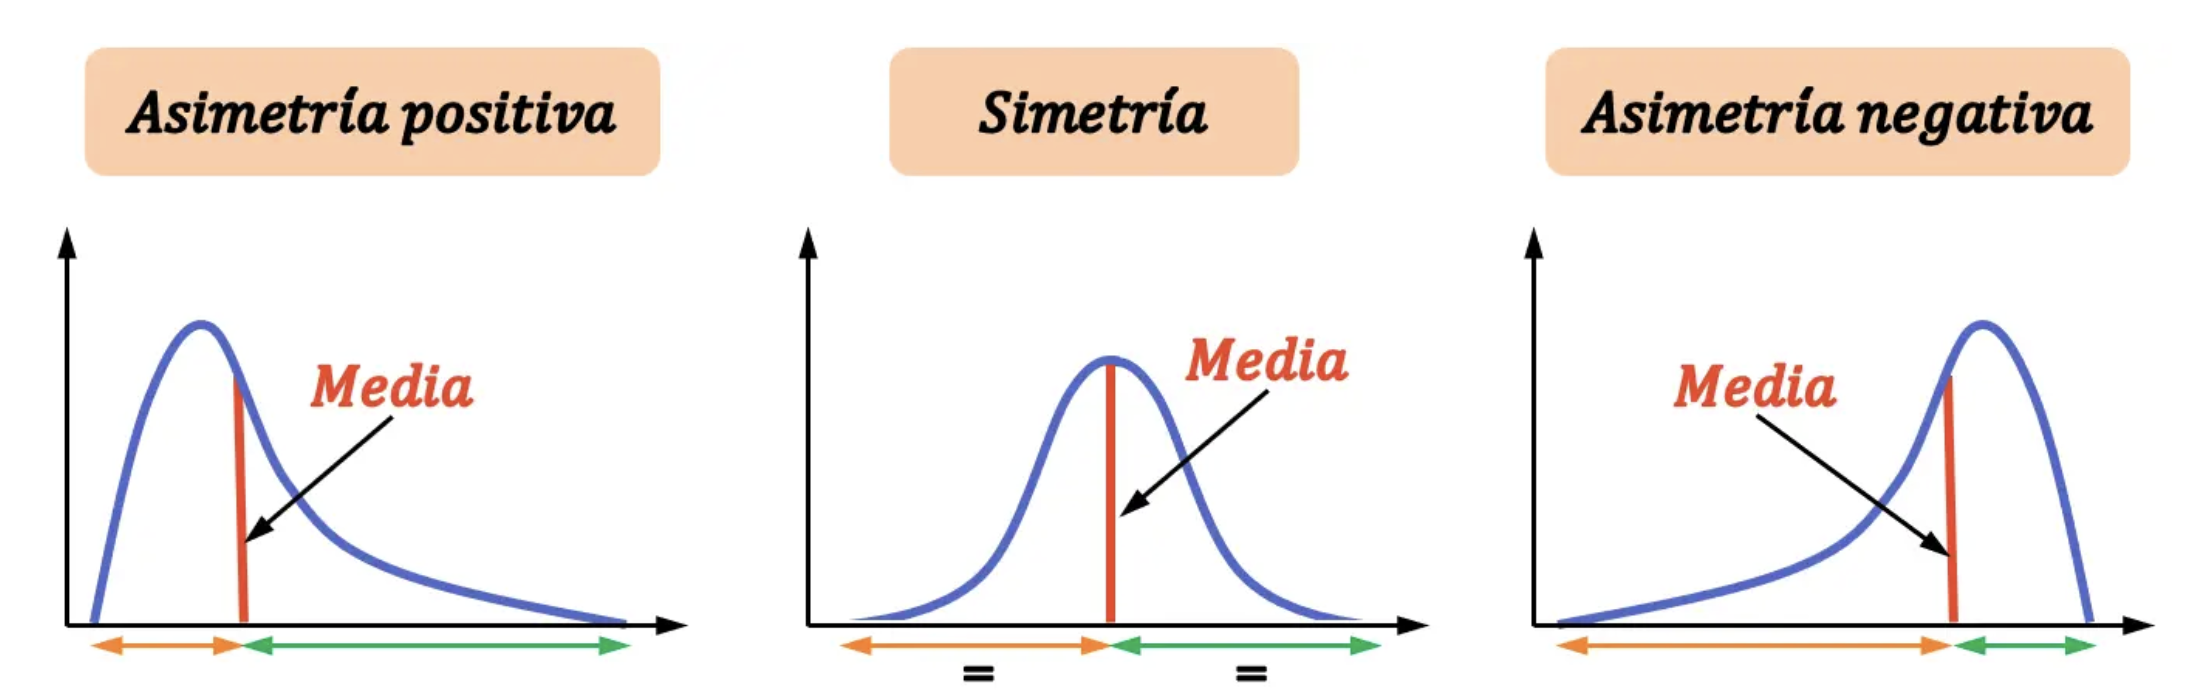

* Si $\gamma_1>0$, la distribución es asimétrica positiva.


* Si $\gamma_1<0$, la distribución es asimétrica negativa.

#### 1. Encuentra el coeficiente de asimetría de los contaminantes.

La **curtosis (Kurtosis)** define en qué  grado las colas de la distribución difieren de las colas de una distribución normal.  Dada una muestra $\{x_1,x_2,...,x_n \}$,  el coeficiente de curtosis  se define como: 

\begin{equation*}
\beta_2=\frac{\sum_{i=1}^n (x_i-\overline{x})^4}{n s^4}.
\end{equation*} 

Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.

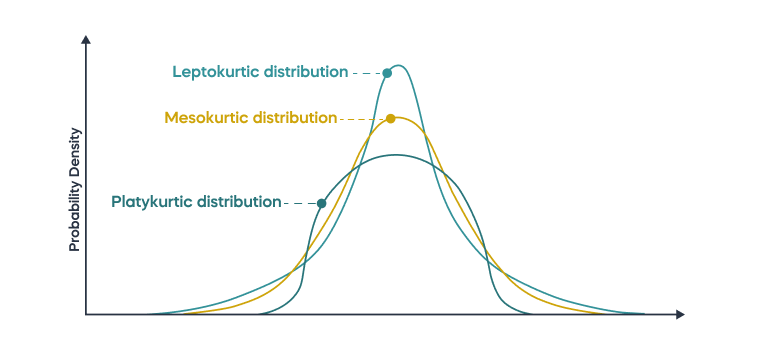

* Si $\beta_2>0$,  la distribución es leptocúrtica (distribución con colas más largas que la normal).


* Si $\beta_2=0$, la distribución es mesocúrtica (cuando tiene una distribución normal o su misma curtosis).


* Si $\beta_2<0$, la distribución es platicúrtica (distribución con colas menos largas que la normal.).

In [5]:
#df.kurt()

## Prueba de normalidad de Shapiro-Wilk

La prueba de Shapiro-Wilk  se usa para contrastar la normalidad de un conjunto de datos. Se plantea como hipótesis nula que una muestra proviene de una población normalmente distribuida. Se considera uno de las pruebas más potentes para el contraste de normalidad. 
El estadístico de la prueba es: 

\begin{equation}
    W = \frac{(\sum_{i=1}^n a_i x_{(i)})^2}{\sum_{i=1}^n (x_i - \overline{x})^2}
\end{equation}

Donde $x_{(i)}$ es el número que ocupa la i-ésima posición de la muestra (ordenada de forma ascendente), $\overline{x}$ es la media muestral y 


\begin{equation*}
(a_1,...,a_n)= \frac{m^T V^{-1}}{( m^T V^{-1} V^{-1}m)^\frac{1}{2}}.
\end{equation*}

Donde $m=(m_1,...,m_n)^T$,  siendo $m_1,...,m_n$ los valores medios del estadístico ordenado, de variables aleatorias independientes e identicamente distribuidas, muestreadas de distribuciones normales y $V$ denota la matriz de covarianzas de ese estadístico de orden.

Se establecen dos hipótesis que se deberán contrastar: 

* Hipótesis nula ($H_0$): la muestra está distribuida normalmente. 

* Hipótesis alternativa ($H_1$): la muestra no está distribuida normalmente. 

Sea $\alpha = 0.05$. Aceptamos la $H_0$ siempre y cuando el $p$-valor de esta prueba estadística  sea mayor que 0.05. Aceptamos la $H_1$ cuando el $p$-valor de la prueba sea menor que 0.05. 

 En [1], se encontró que la prueba de normalidad de Shapiro-Wilk es más potente para diferentes tamaños de muestra, que otras pruebas de normalidad, tales como la prueba de Kolmogorov-Smirnov, la prueba de Lilliefors y prueba de Anderson-Darling. Sin embargo, el poder de la prueba de Shapiro-Wilk aún es bajo para un tamaño de muestra pequeño ($n <50$).

[1] Razali, N. and Wah, Y., *Power Comparisons of Shapiro-Wilk, Kolmogorov-Smirnov, Lilliefors and Anderson-Darling Tests*, Journal of Statistical Modeling and Analytics, Vol. 2, No. 1, (2011), 21-33. 

#### 2. Realiza la prueba de S-W a los contaminantes.

In [44]:
from scipy.stats import shapiro



# Correlación

La correlación es una medida de la relación lineal entre dos variables cuantitativas contínuas (x, y). La manera más sencilla de saber si dos variables están correlacionadas es determinar si co-varían (varían conjuntamente). La correlación es en esencia una medida de asociación lineal entre dos variables. Esta medida o índice de correlación $r$ puede variar entre -1 y +1, ambos extremos indicando correlaciones perfectas, negativa y positiva respectivamente. El índice $r$ es una medida del tamaño del efecto, que suele interpretarse de la siguiente manera:

* correlación despreciable: $r < |0.1|$
* correlación baja: $|0.1| < r \leq |0.3|$
* correlación mediana : $|0.3| < r \leq |0.5|$
* correlación fuerte o alta: $r > |0.5|$






## Coeficiente de correlación de Pearson

El coeficiente de correlación de Pearson es una prueba que mide la relación estadística entre dos variables continuas. Dados $n$ pares de datos $\{(x_i,y_i) \}_{i\leq n}$,  se define el coeficiente de correlación muestral de Pearson como 

$$
r_{xy}=\frac{\sum_{i=1}^n (x_{i} - \overline{x}) (x_{i} - \overline{y})    }{\sqrt{\sum_{i=1}^n (x_{i} - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_{i} - \overline{y})^2}}.
$$

Donde $n$ es el tamaño de la muestra, $\overline{x}$ y $\overline{y}$ son las medias muestrales de $\{x_i \}_{i\leq n}$ y $\{y_i \}_{i\leq n}$, respectivamente.

Suposiciones vinculadas al uso del coeficiente de correlación de Pearson:

* Es necesario las dos variables sean medidas a un nivel cuantitativo continuo. 

* La distribución de las variables deben ser semejantes a la curva normal.


## Coeficiente de correlación de Spearman

El coeficiente de correlación de Spearman $\rho$, es una medida de la correlación entre dos variables aleatorias. Esta es una medida no paramétrica de la correlación de rango. Se utiliza principalmente en el análisis de datos para medir la relación entre dos variables.
Para calcular $\rho$, los datos son ordenados y reemplazados por su respectivo orden. Este coeficiente se expresa como sigue:

\begin{equation*}
    \rho=1-\frac{6\sum d^2}{N(N^2-1)}
\end{equation*}

donde $d$ es la diferencia entre los correspondientes estadísticos de orden de $X$ y $Y$.  $N$ es el número de parejas de datos.

Una gran ventaja de la prueba de correlación de Spearman es que no importa si las variables tiene una distribución normal, y en lugar de trabajar con los valores originales de los datos, la correlación de Spearman se calcula a partir de los rangos de los datos.

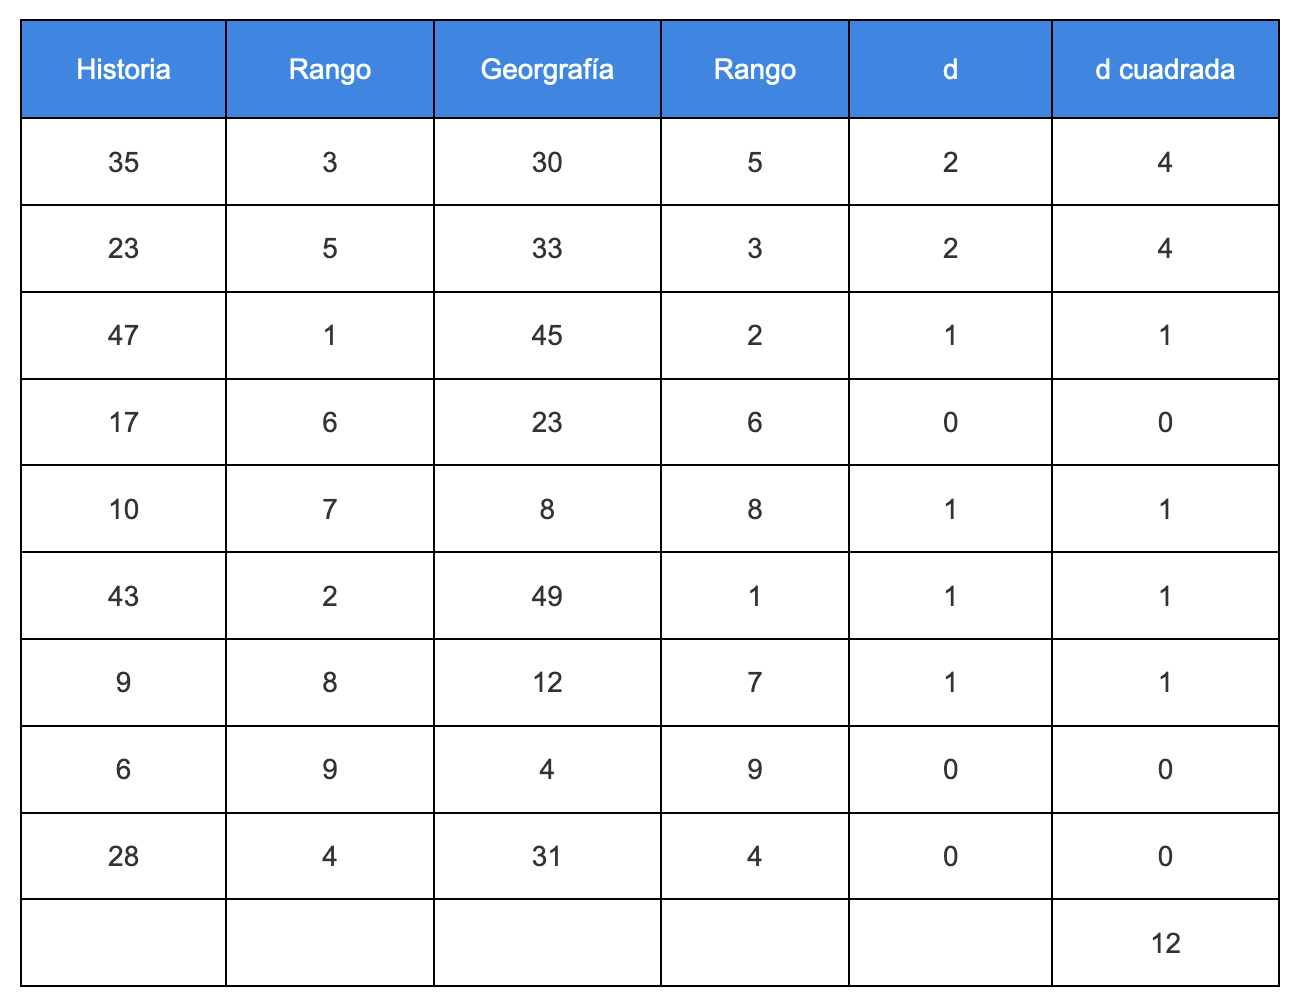

In [7]:
A=[35,23,47,17,10,43,9,6,28]
B=[30,33,45,23,8,49,12,4,31]

#### 3. Encuentre la correlación entre los contaminantes e ilustra esto mediante un gráfico.

colores cmap: https://matplotlib.org/stable/users/explain/colors/colormaps.html

#### 4. Obtenga un Dataframe con los contaminantes que tengan una correlación alta en orden descendente. Y los diagramas de dispersión entre todos los contaminantes.

# Factores meteorológicos

La Red de Meteorología y Radiación Solar (REDMET) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de temperatura (TMP), humedad relativa (RH), dirección del viento (WDR) y la velocidad del viento (WSP).

https://datos.cdmx.gob.mx/dataset/redmet

## ¿Existe una correlación entre los contaminantes y los factores meteorológicos?

#### 5. Obtenga un Dataframe con las concentraciones promedio diarias de ozono por región en 2022 y un gráfico de la concentración promedio mensual por región.



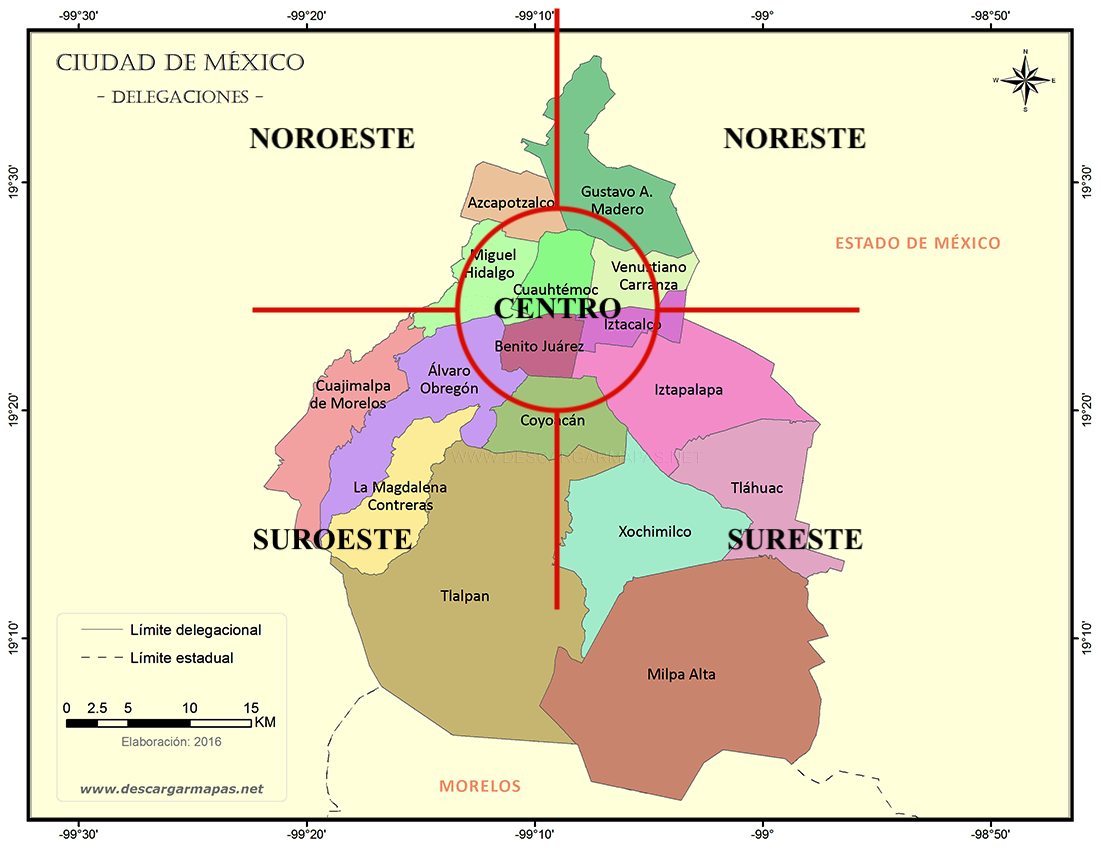